In [1]:
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from tqdm import tqdm
from itertools import product
from PIL import Image, ImageDraw, ImageFont
import cv2
from generator import captcha_generator as gen

Using TensorFlow backend.


In [19]:

chars = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy"
width, height, n_len, n_class = 140, 44, 6, len(chars)
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

In [11]:
model = load_model('mycnn_v201704261650_v6_adadelta.h5')

In [12]:
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen(width=width, height=height)
    for i in tqdm(range(batch_num)):
        X, y = generator.next()
        y_pred = model.predict(X)
        batch_acc += np.mean(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T))
    return batch_acc / batch_num

In [13]:
print evaluate(model)

100%|██████████| 20/20 [00:52<00:00,  2.55s/it]

0.0


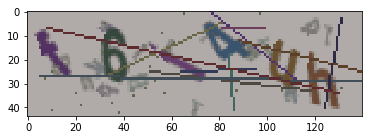

y: UtYqgW
pred_y: f6i4uh


In [25]:
a = gen(width=width, height=height, batch_size=1)
X, y = a.next()
pred_y = model.predict(X)
plt.imshow(X[0])
plt.show()
print 'y:', decode(y)
print 'pred_y:', decode(pred_y)

In [26]:
path = "sample/yanzhengma%d.png" %(random.randint(0, 1000))
X = cv2.imread(path)
print X.shape
X = X.reshape((1, )+X.shape)
print X.shape

(44, 140, 3)
(1, 44, 140, 3)


(44, 140, 3)
(1, 44, 140, 3)


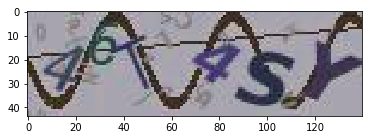

pred_y: 46I4SY


In [166]:
path = "sample/yanzhengma%d.png" %(random.randint(0, 1000))
X = cv2.imread(path)
print X.shape
X = X.reshape((1, )+X.shape)
print X.shape

pred_y = model.predict(X)
plt.imshow(X[0])
plt.show()
print 'pred_y:', decode(pred_y)